In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

## 1. Data Random

Make the number from random generator function remain the same 

In [2]:
np.random.seed(0)

Make random cluster points
<br>
Note:
- X is two dimension array that contains coordinates each sample
- y is one dimension array that contains the label of each sample

In [3]:
X, y = make_blobs(n_samples=3000, centers=[[1, 0], [3, -2], [-2, -4], [-1, -2]], cluster_std=0.9)

Visualize the data from X:
<br>
Note:
- `X[:, 0]` means every x coordinate in X
- `Y[:, 1]` means every y coordinate in Y

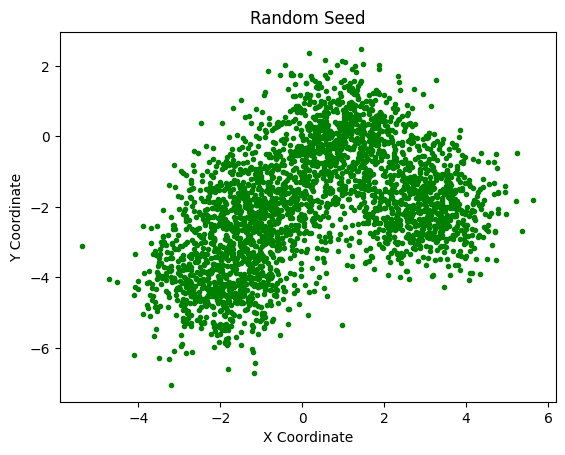

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='.', color="green")
plt.title("Random Seed")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

### 2 Cluster

Setting K-Means for 2 clusters:
<br>
Note:
- `init='k-means++'` to initialize the center of cluster
- `n_init=12` means the number of the algorithm runs

In [5]:
k_means = KMeans(init='k-means++', n_clusters=2, n_init=12)

Fit the model with the data:

In [6]:
k_means.fit(X)

KMeans(n_clusters=2, n_init=12)

Get the label of each point:

In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 1, 1, ..., 1, 0, 0])

Get the center of each cluster:

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.84674116, -1.03036113],
       [-1.64973585, -3.12078666]])

Visualize the data:

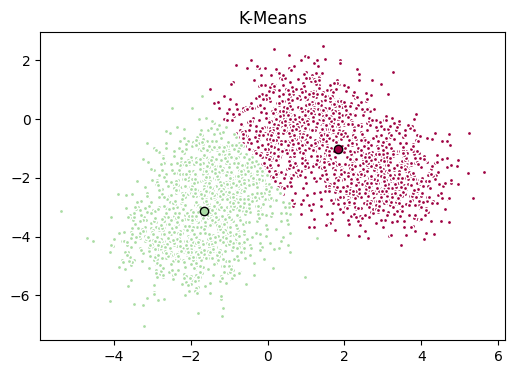

In [9]:
fig = plt.figure(figsize=(6, 4))

colors = plt.cm.Spectral(np.linspace(0, 0.7, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[1, 0], [3, -2], [-2, -4], [-1, -2]])), colors):
    my_members = (k_means_labels == k)

    # Define the centroids
    cluster_center = k_means_cluster_centers[k]

    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('K-Means')

plt.show()

### 3 Clusters

Setting K-Means for 3 clusters:

In [10]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

Visualize the data:

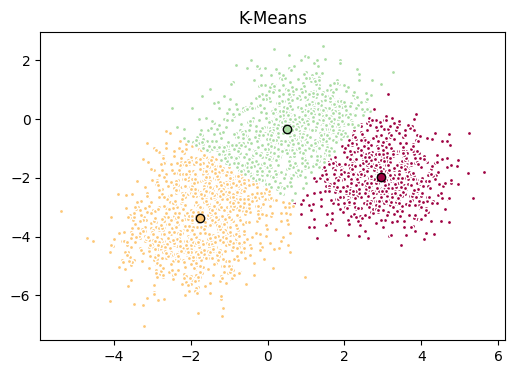

In [11]:
fig = plt.figure(figsize=(6, 4))

# Generate colors without including yellow
colors = plt.cm.Spectral(np.linspace(0, 0.7, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[1, 0], [3, -2], [-2, -4], [-1, -2]])), colors):
    my_members = (k_means_labels == k)

    # Define the centroids
    cluster_center = k_means_cluster_centers[k]

    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('K-Means')

plt.show()


## 2. Vehicle Sales Data

In [12]:
import pandas as pd

In [13]:
cust_df = pd.read_csv("car_prices.csv")
cust_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [14]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [15]:
df = cust_df.dropna()
print("Length Before: ", len(cust_df))
print("Length After: ", len(df))
print("Data Removed: ", len(cust_df) - len(df))
df.head()

Length Before:  558837
Length After:  472325
Data Removed:  86512


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


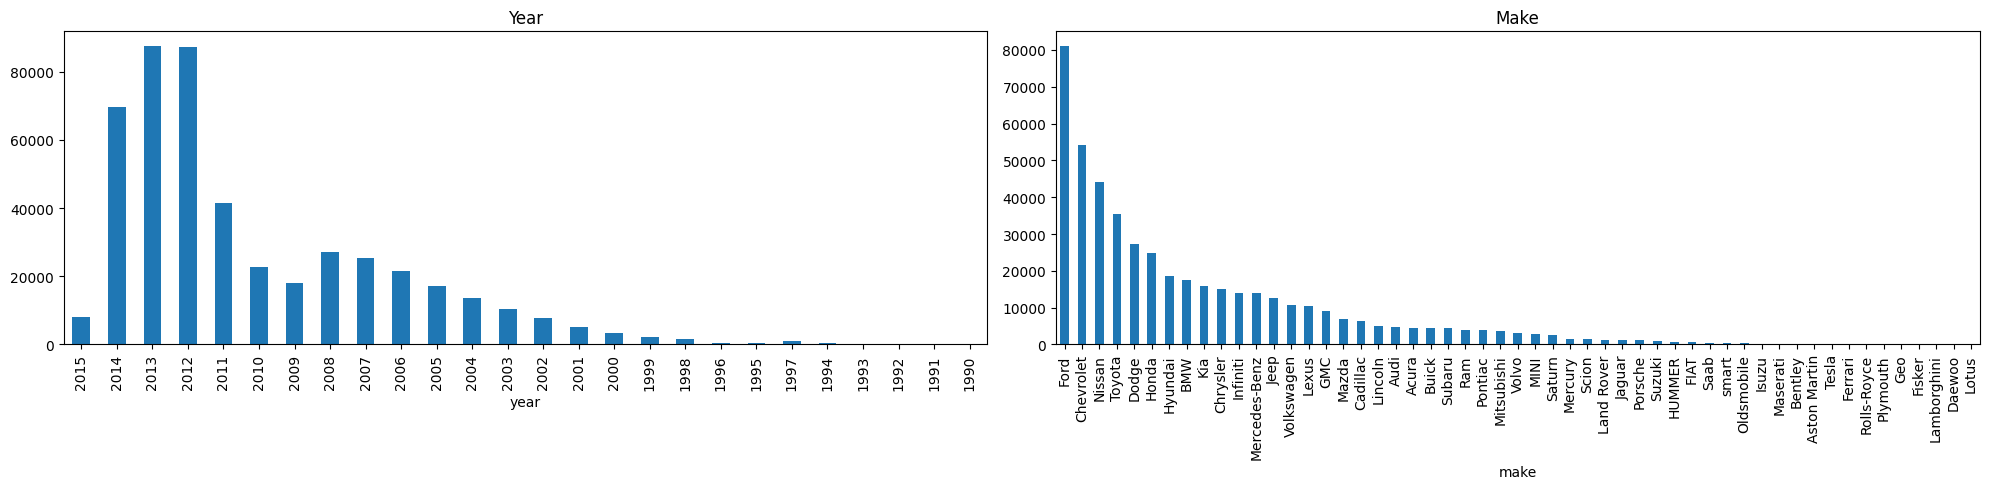

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

df['year'].value_counts()[df['year'].unique()].plot(kind='bar', ax=axes[0])
axes[0].set_title('Year')

df['make'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Make')

plt.tight_layout()
plt.show()

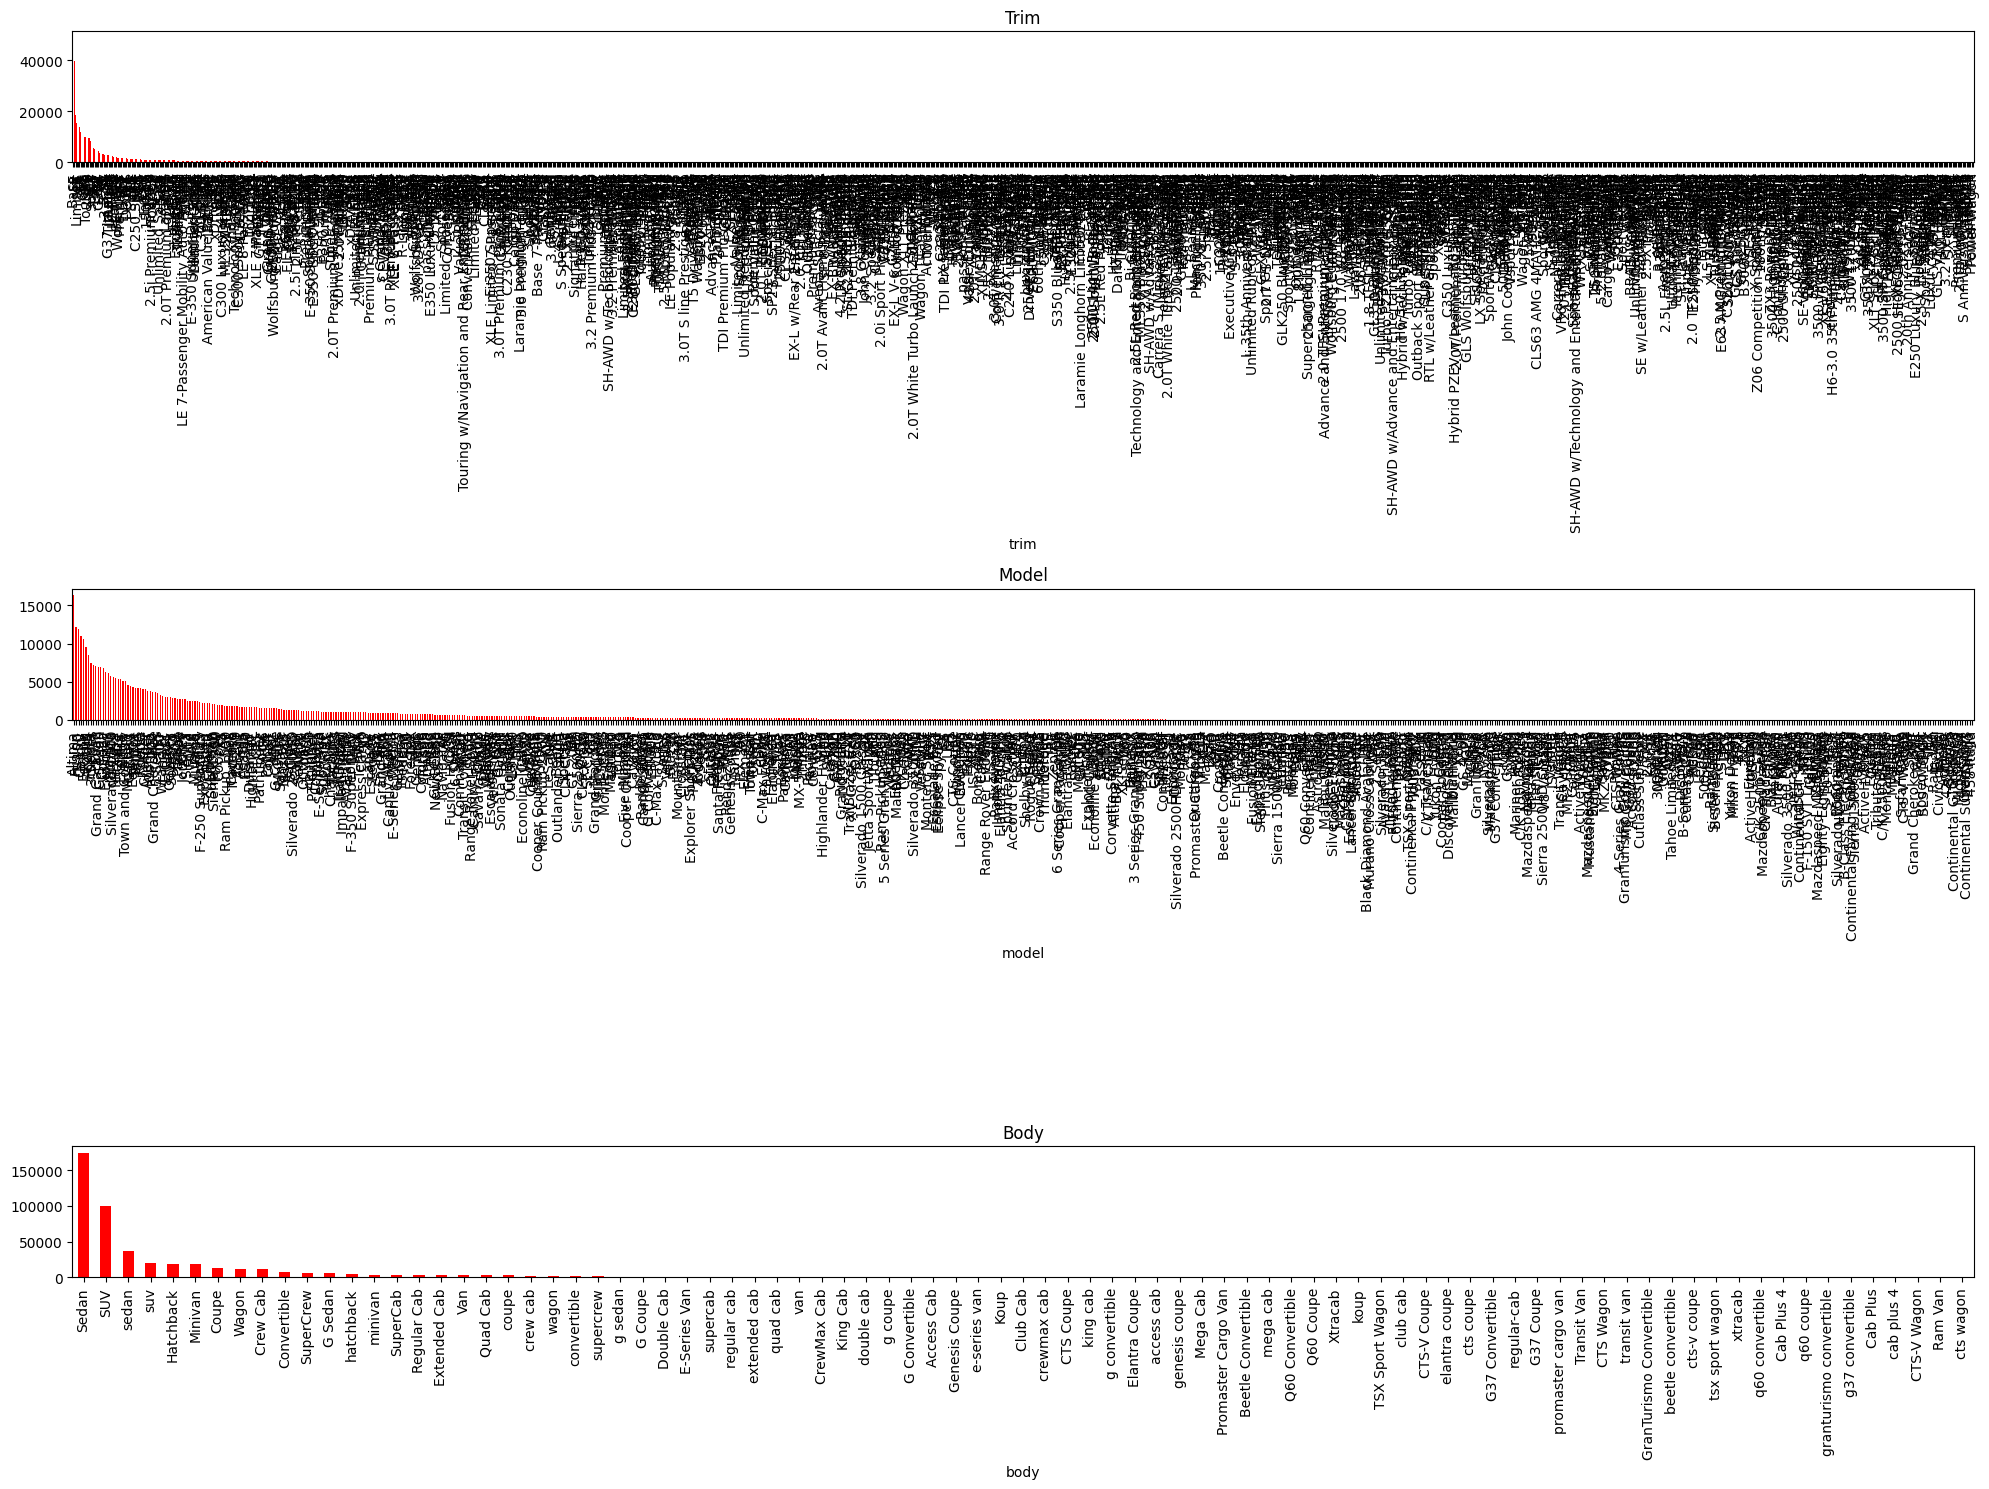

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

df['trim'].value_counts().plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Trim')

df['model'].value_counts().plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Model')

df['body'].value_counts().plot(kind='bar', ax=axes[2], color='red')
axes[2].set_title('Body')

plt.tight_layout()
plt.show()

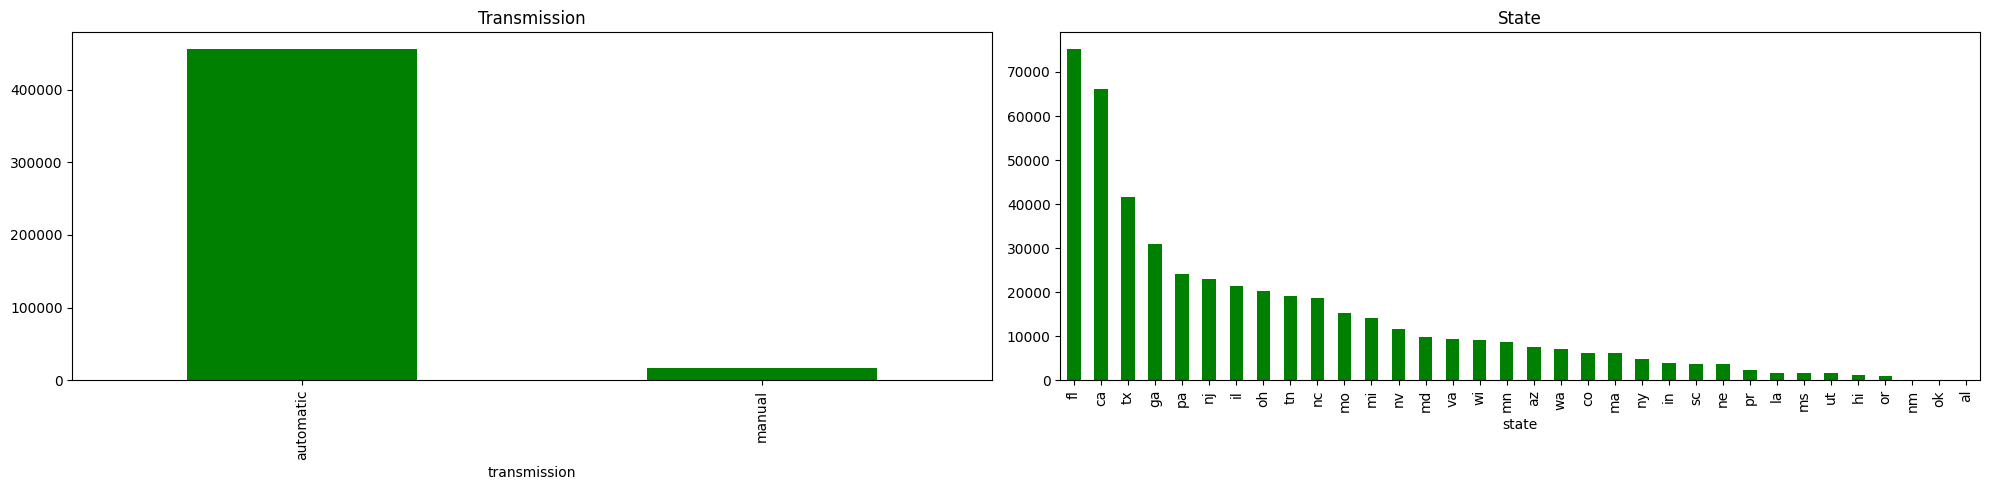

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

df['transmission'].value_counts().plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Transmission')

df['state'].value_counts().plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('State')

plt.tight_layout()
plt.show()

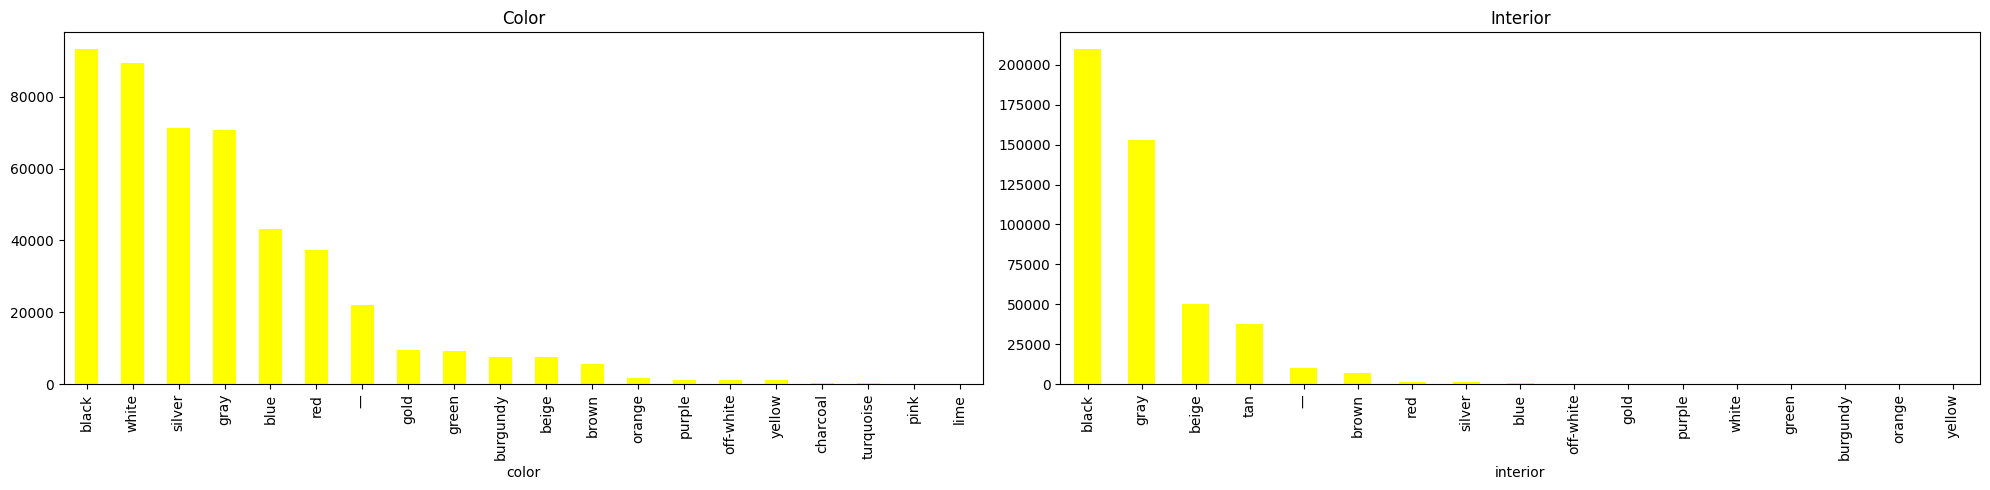

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

df['color'].value_counts().plot(kind='bar', ax=axes[0], color='yellow')
axes[0].set_title('Color')

df['interior'].value_counts().plot(kind='bar', ax=axes[1], color='yellow')
axes[1].set_title('Interior')

plt.tight_layout()
plt.show()

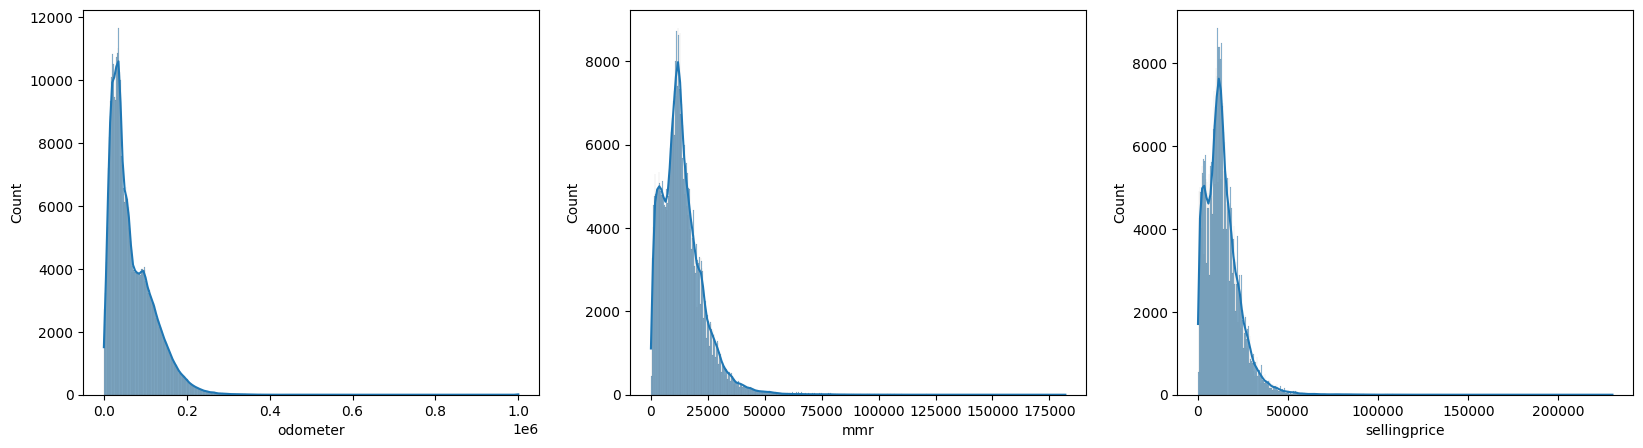

In [20]:
plt.figure(figsize=(20, 5))
n = 0
for cols in ['odometer', 'mmr', 'sellingprice']:
    n += 1
    plt.subplot(1, 3, n)
    sns.histplot(df[cols], kde=True)
    plt.ylabel('Count')

plt.show()

In [21]:
df['seller'].value_counts()

seller
ford motor credit company llc    17756
the hertz corporation            16286
nissan-infiniti lt               15777
santander consumer               14245
avis corporation                 11471
                                 ...  
scottsdale autos online llc          1
rally motorsports llc                1
zippy rent a car llc                 1
suburban chrysler jeep dodge         1
i -5 uhlmann rv                      1
Name: count, Length: 11923, dtype: int64

Drop all categorical atributs:

In [22]:
categorical_atribut = ['make', 'model', 'trim', 'body', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']
data = df.drop(columns=categorical_atribut)
data.head()
df.shape

(472325, 16)

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['transmission_num'] = label_encoder.fit_transform(data['transmission'])
data.drop(columns=['transmission'], inplace=True)
data.head()

,year,condition,odometer,mmr,sellingprice,transmission_num
0,2015,5.0,16639.0,20500.0,21500.0,0
1,2015,5.0,9393.0,20800.0,21500.0,0
2,2014,45.0,1331.0,31900.0,30000.0,0
3,2015,41.0,14282.0,27500.0,27750.0,0
4,2014,43.0,2641.0,66000.0,67000.0,0


In [24]:
from sklearn.preprocessing import StandardScaler

X = data.values[:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

data_clean = pd.DataFrame(Clus_dataSet, columns=data.columns)
data_clean.head()

,year,condition,odometer,mmr,sellingprice,transmission_num
0,1.252966,-1.939826,-0.963866,0.698992,0.812386,-0.189432
1,1.252966,-1.939826,-1.103374,0.730464,0.812386,-0.189432
2,0.991333,1.070669,-1.258593,1.894936,1.696603,-0.189432
3,1.252966,0.769620,-1.009245,1.433343,1.462546,-0.189432
4,0.991333,0.920144,-1.233371,5.472277,5.545548,-0.189432


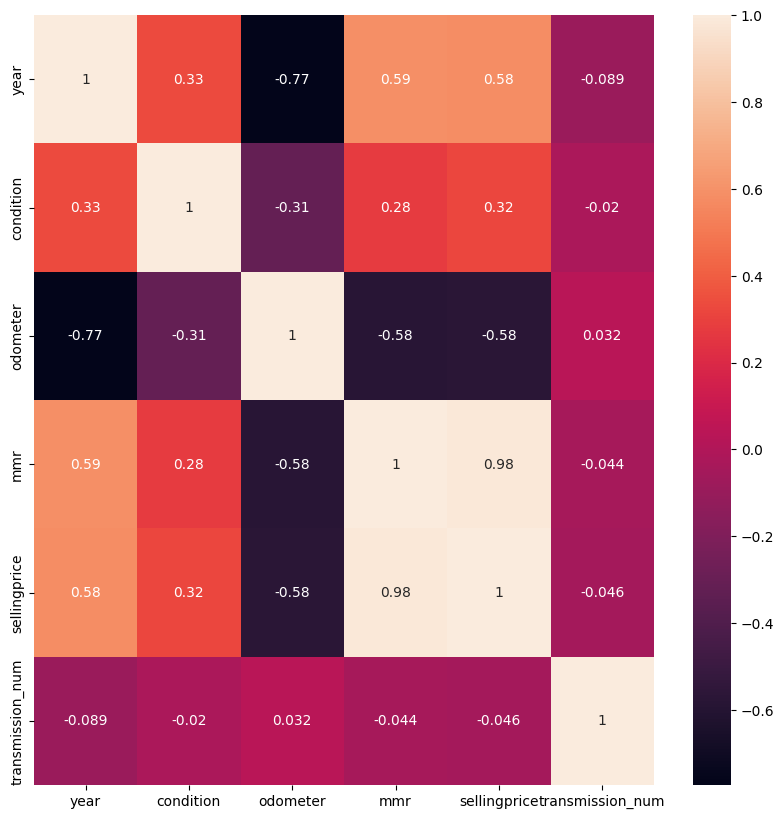

In [25]:
corr = data_clean.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [26]:
data_clean.drop(columns=['transmission_num'], inplace=True)
data_clean.head()

,year,condition,odometer,mmr,sellingprice
0,1.252966,-1.939826,-0.963866,0.698992,0.812386
1,1.252966,-1.939826,-1.103374,0.730464,0.812386
2,0.991333,1.070669,-1.258593,1.894936,1.696603
3,1.252966,0.769620,-1.009245,1.433343,1.462546
4,0.991333,0.920144,-1.233371,5.472277,5.545548


### Modelling Data

Modelling the data:

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data_clean.iloc[:, [3, 4]].values

array([[ 0.69899159,  0.81238623],
       [ 0.7304638 ,  0.81238623],
       [ 1.89493555,  1.69660335],
       ...,
       [ 1.67463009,  2.11270552],
       [ 0.13249182, -0.26947942],
       [ 1.65364861,  1.35331905]])

In [28]:
x = data_clean.iloc[:, [3, 4]].values
wcss = []
scores = []
for i in range(2, 8):
    km = KMeans(n_clusters= i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

    labels = km.labels_
    # silhouette_avg = silhouette_score(x, labels)
    # scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    # print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg) + '\n')

wcss score for n_cluster = 2 is [404808.7135550465]
wcss score for n_cluster = 3 is [404808.7135550465, 242046.22044685466]
wcss score for n_cluster = 4 is [404808.7135550465, 242046.22044685466, 152560.50386189812]
wcss score for n_cluster = 5 is [404808.7135550465, 242046.22044685466, 152560.50386189812, 106523.37229885937]
wcss score for n_cluster = 6 is [404808.7135550465, 242046.22044685466, 152560.50386189812, 106523.37229885937, 78692.02450948178]
wcss score for n_cluster = 7 is [404808.7135550465, 242046.22044685466, 152560.50386189812, 106523.37229885937, 78692.02450948178, 61356.552423822315]


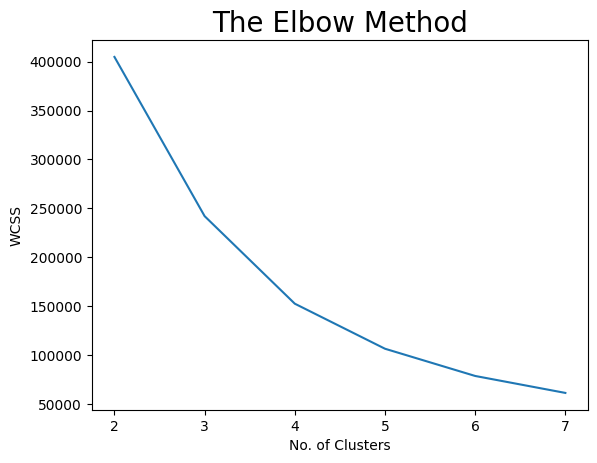

In [29]:
plt.plot(range(2, 8), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(data_clean)
labels = k_means.labels_
data_clean.head()

,year,condition,odometer,mmr,sellingprice
0,1.252966,-1.939826,-0.963866,0.698992,0.812386
1,1.252966,-1.939826,-1.103374,0.730464,0.812386
2,0.991333,1.070669,-1.258593,1.894936,1.696603
3,1.252966,0.769620,-1.009245,1.433343,1.462546
4,0.991333,0.920144,-1.233371,5.472277,5.545548


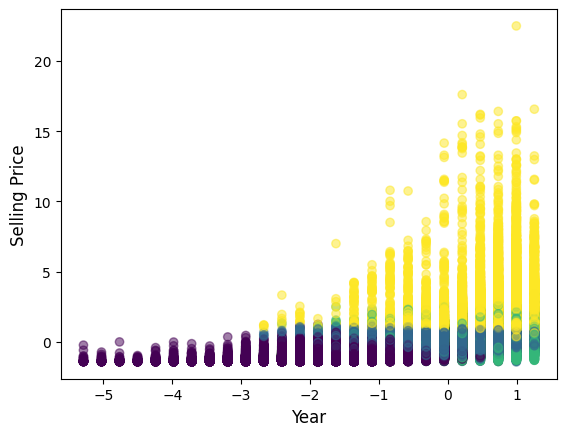

In [48]:
WKWK = data_clean.values[:]

plt.scatter(WKWK[:, 0], WKWK[:, 4], c=labels.astype(np.float32), alpha=0.5)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.show()

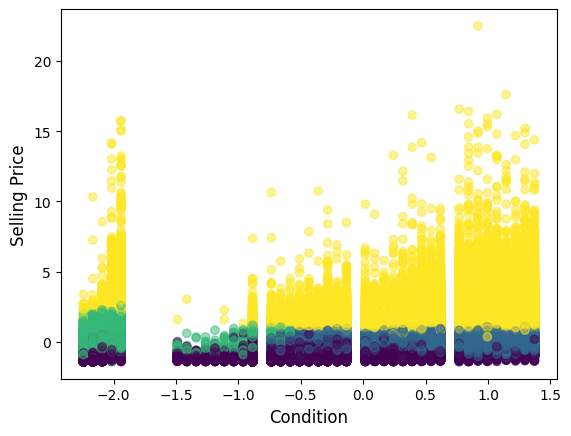

In [49]:
plt.scatter(WKWK[:, 1], WKWK[:, 4], c=labels.astype(np.float32), alpha=0.5)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.show()

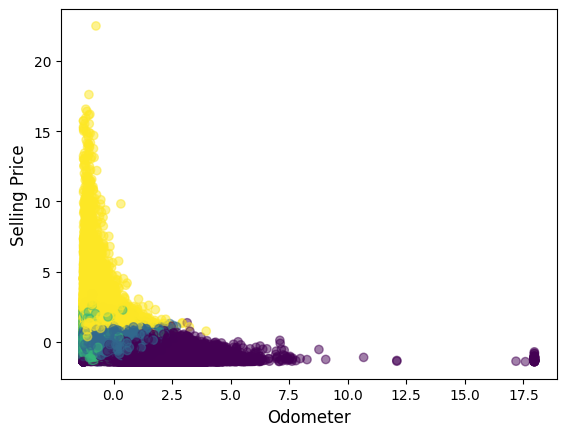

In [50]:
plt.scatter(WKWK[:, 2], WKWK[:, 4], c=labels.astype(np.float32), alpha=0.5)
plt.xlabel('Odometer', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.show()

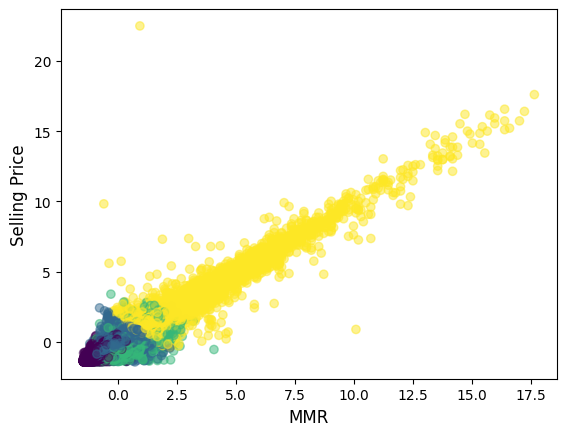

In [51]:
plt.scatter(WKWK[:, 3], WKWK[:, 4], c=labels.astype(np.float32), alpha=0.5)
plt.xlabel('MMR', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.show()

## Analisis:

Berdasarkan kolom `sellingprice` yang menjadi masalah utama pada data ini, didapatkan:
- Mobil yang diproduksi pada zaman dahulu lebih murah dibandingkan dengan mobil yang diproduksi pada zaman sekarang, dengan kata lain semakin lama tahun mobil dibuat maka semakin murah begitu juga kebalikannya.
- Untuk Kondisi mobil, beberapa mobil dengan kondisi rendah dengan sellingprice tinggi mungkin mobil tersebut langka, tetapi secara normal semakin baik kondisi mobil semakin mahal pula.
- Mobil dengan jarak tempuh yang sudah jauh akan lebih murah ,artinya mobil tersebut telah menempuh banyak kilometer.
- Mobil dengan sellingprice tinggi maka akan semakin tinggi juga MMR-nya.